To learn Exploratory Data Analysis, I'm following steps, and using code from [GeeksForGeeks: Steps for Mastering EDA](https://www.geeksforgeeks.org/data-analysis/steps-for-mastering-exploratory-data-analysis-eda-steps/) 

In [14]:
import pandas as pd
import numpy as np

# EEG_data.csv: main numerical EEG features and the target label (subject_understood)
df1 = pd.read_csv("data/raw/EEG_data.csv")

# Subject_details.csv: metadata about each student (age, gender, education, etc.)
df2 = pd.read_csv("data/raw/Subject_details.csv")

# Video_details.csv: metadata about each video (title, instructor, URL, etc.)
df3 = pd.read_csv("data/raw/Video_details.csv")

In [15]:
# First 5 rows of EEG_data: quick peek at the structure
df1.head()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,1.583895,0.504567,0.471979,0.138717,1.801014,1.504794,0.258570,0.435745,0.469483,0
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,1.709560,0.606587,0.527616,0.155580,1.859177,1.379617,0.317579,0.468416,0.642560,0
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,1.873591,0.795834,0.565414,0.170816,2.027946,1.283876,0.441925,0.494701,0.798197,0
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,2.110017,1.021118,0.579656,0.180056,2.265952,1.306188,0.616881,0.506062,0.886495,0
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,2.462552,1.230984,0.573620,0.181081,2.461205,1.522420,0.822598,0.498361,0.874455,0


In [16]:
# Number of rows and columns in EEG_data
df1.shape

(68831, 87)

In [17]:
# Detailed information: column types, non-null counts, memory usage
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68831 entries, 0 to 68830
Data columns (total 87 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   video_id            68831 non-null  int64  
 1   subject_id          68831 non-null  int64  
 2   EEG.AF3             68831 non-null  float64
 3   EEG.F7              68831 non-null  float64
 4   EEG.F3              68831 non-null  float64
 5   EEG.FC5             68831 non-null  float64
 6   EEG.T7              68831 non-null  float64
 7   EEG.P7              68831 non-null  float64
 8   EEG.O1              68831 non-null  float64
 9   EEG.O2              68831 non-null  float64
 10  EEG.P8              68831 non-null  float64
 11  EEG.T8              68831 non-null  float64
 12  EEG.FC6             68831 non-null  float64
 13  EEG.F4              68831 non-null  float64
 14  EEG.F8              68831 non-null  float64
 15  EEG.AF4             68831 non-null  float64
 16  POW.

In [18]:
# Number of unique values in each column (helps see IDs vs continuous vars)
df1.nunique()

video_id                 11
subject_id                8
EEG.AF3                6091
EEG.F7                 6520
EEG.F3                 5932
                      ...  
POW.AF4.Alpha         68246
POW.AF4.BetaL         67644
POW.AF4.BetaH         66654
POW.AF4.Gamma         65002
subject_understood        2
Length: 87, dtype: int64

In [19]:
# Basic statistics: mean, std, min, max, quartiles for numeric columns
df1.describe()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,POW.F8.Alpha,POW.F8.BetaL,POW.F8.BetaH,POW.F8.Gamma,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood
count,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,...,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000
mean,5.624297,3.710828,4276.496212,4257.994590,4302.803482,4292.027479,4302.093465,4243.397476,4231.846947,4240.153361,...,5.386578,2.847343,1.356892,0.770303,22.591861,8.133554,3.861532,1.520038,0.697575,0.789906
std,2.215993,1.828410,115.584631,140.884855,113.720961,135.578849,117.727171,118.189886,115.590762,137.366806,...,42.886793,36.480798,17.930204,8.991064,150.716768,51.722390,35.243356,13.153730,3.937423,0.407378
min,0.000000,0.000000,1030.769287,805.384644,1320.769287,806.538452,1904.487183,1710.769287,1794.871826,1466.538452,...,0.051299,0.036999,0.062924,0.043833,0.195020,0.077566,0.041230,0.056951,0.035907,0.000000
25%,5.000000,3.000000,4258.461426,4236.410156,4283.205078,4273.077148,4282.436035,4220.769043,4211.602539,4218.205078,...,1.093447,0.619023,0.340121,0.166746,1.840644,0.997642,0.511406,0.284404,0.139540,1.000000
50%,6.000000,4.000000,4287.307617,4266.538574,4305.897461,4297.436035,4312.179688,4253.846191,4244.487305,4252.948730,...,1.921246,1.032671,0.612935,0.366483,3.317688,1.679386,0.833078,0.472978,0.262676,1.000000
75%,6.000000,4.000000,4311.153809,4296.153809,4327.692383,4322.563965,4342.179688,4282.820313,4271.794922,4279.615234,...,3.587066,1.850553,1.076909,0.708885,7.129672,3.035433,1.464920,0.837565,0.516598,1.000000
max,10.000000,7.000000,6238.077148,7599.615234,6291.794922,7600.128418,7599.615234,6695.641113,7525.128418,7611.025879,...,3825.365967,3803.180664,2010.126343,966.228027,8159.436035,3092.790283,3372.114746,1347.074341,331.578979,1.000000


In [20]:
# First 5 rows of Subject_details
df2.head()

,Subject_ID,Gender,Age,Education Level,Fields of Interest,Ethnicity
0,0,M,23,University (4th year),Business,Arab
1,1,F,24,High School Graduate,Fashion Design,Arab
2,2,M,14,High School (10th Grade),Sports,Arab
3,3,M,17,High School (12th Grade),Technology,Arab
4,4,M,22,University (4th year),Technology,Arab


In [21]:
# Shape of Subject_details
df2.shape

(8, 6)

In [22]:
# Column types and non-null counts for Subject_details
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Subject_ID          8 non-null      int64 
 1   Gender              8 non-null      object
 2   Age                 8 non-null      int64 
 3   Education Level     8 non-null      object
 4   Fields of Interest  8 non-null      object
 5   Ethnicity           8 non-null      object
dtypes: int64(2), object(4)
memory usage: 516.0+ bytes


In [23]:
# Unique values in each column of Subject_details
df2.nunique()

Subject_ID            8
Gender                2
Age                   8
Education Level       6
Fields of Interest    6
Ethnicity             2
dtype: int64

In [24]:
# Summary statistics for numeric columns in Subject_details (e.g., Age)
df2.describe()

,Subject_ID,Age
count,8.00000,8.000000
mean,3.50000,18.000000
std,2.44949,4.956958
min,0.00000,11.000000
25%,1.75000,13.750000
50%,3.50000,18.500000
75%,5.25000,22.250000
max,7.00000,24.000000


In [25]:
# First 5 rows of Video_details
df3.head()

,Video_ID,Title,URL,Instructor
0,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
1,1,Statistics,https://www.youtube.com/watch?v=h8EYEJ32oQ8&t=...,Sal Khan (Khan Academy)
2,2,String Theory,https://www.youtube.com/watch?v=25haxRuZQUk&li...,Leonard Susskind
3,3,Photosynthesis,https://www.youtube.com/watch?v=g78utcLQrJ4&t=...,Paul Anderson
4,4,Linear Algebra 1,https://www.youtube.com/watch?v=ZK3O402wf1c&li...,Gilbert Strang


In [26]:
# Shape of Video_details
df3.shape

(11, 4)

In [27]:
# Column types and non-null counts for Video_details
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Video_ID    11 non-null     int64 
 1   Title       11 non-null     object
 2   URL         11 non-null     object
 3   Instructor  11 non-null     object
dtypes: int64(1), object(3)
memory usage: 484.0+ bytes


In [28]:
# Unique values in each column of Video_details
df3.nunique()

Video_ID      11
Title         11
URL           11
Instructor     8
dtype: int64

In [29]:
# Summary stats for numeric columns in Video_details (if any)
df3.describe()

,Video_ID
count,11.000000
mean,5.000000
std,3.316625
min,0.000000
25%,2.500000
50%,5.000000
75%,7.500000
max,10.000000


In [30]:
# Count missing values for each column in EEG_data
df1.isnull().sum()

video_id              0
subject_id            0
EEG.AF3               0
EEG.F7                0
EEG.F3                0
                     ..
POW.AF4.Alpha         0
POW.AF4.BetaL         0
POW.AF4.BetaH         0
POW.AF4.Gamma         0
subject_understood    0
Length: 87, dtype: int64

In [31]:
# Count missing values for each column in Subject_details
df2.isnull().sum()

Subject_ID            0
Gender                0
Age                   0
Education Level       0
Fields of Interest    0
Ethnicity             0
dtype: int64

In [32]:
# Count missing values for each column in Video_details
df3.isnull().sum()

Video_ID      0
Title         0
URL           0
Instructor    0
dtype: int64

In [33]:
import pandas as pd

# Create a binary encoding for Gender:
# M -> 1, F -> 0
df2['Gender_bin'] = df2['Gender'].map({'M': 1, 'F': 0})

# Check that the new column looks correct
print(df2.head())

   Subject_ID Gender  Age           Education Level Fields of Interest  \
0           0      M   23     University (4th year)           Business   
1           1      F   24      High School Graduate     Fashion Design   
2           2      M   14  High School (10th Grade)             Sports   
3           3      M   17  High School (12th Grade)         Technology   
4           4      M   22     University (4th year)         Technology   

  Ethnicity  Gender_bin  
0      Arab           1  
1      Arab           0  
2      Arab           1  
3      Arab           1  
4      Arab           1  


Comment:
This is mainly useful when I will be later using Gender as a numeric feature for ML models.
For pure EDA and plots, I'm keeping "M" and "F" as categories (Seaborn handles that well).

# Step 6: Visualize Data Relationships

## Univariate Analysis

Here I start with simple univariate plots (one variable at a time)
to understand the distribution of basic IDs and counts in the EEG data.
Later I will add bivariate plots (relationships between two variables).


### Pre-visualization Data Preparation

Before visualizing our data, let's merge all 3 tables so there is one big data frame. This will allow us to analyze correlations and differences between groups as EEG_data.csv only gives as numerical channels.

In [34]:
import pandas as pd

# Reload the three CSVs (you could also reuse df1, df2, df3 from above)
eeg = pd.read_csv("data/raw/EEG_data.csv")
subjects = pd.read_csv("data/raw/Subject_details.csv")
videos = pd.read_csv("data/raw/Video_details.csv")

# 1) Merge row-level EEG data with subject metadata.
#    Keys:
#       EEG_data:       subject_id
#       Subject_details: Subject_ID
#    We keep all EEG rows (how="left") and attach subject info where available.
df = eeg.merge(
    subjects,
    left_on="subject_id",
    right_on="Subject_ID",
    how="left"
)

# 2) Merge with video metadata.
#    Keys:
#       EEG_data:     video_id
#       Video_details: Video_ID
#    This adds Title / Instructor / URL to each EEG row.
df = df.merge(
    videos,
    left_on="video_id",
    right_on="Video_ID",
    how="left"
)


In [35]:
# Quick sanity check: the merged dataframe should now contain
# EEG features + subject info + video info + subject_understood label
df.head()

,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,...,Subject_ID,Gender,Age,Education Level,Fields of Interest,Ethnicity,Video_ID,Title,URL,Instructor
0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,...,0,M,23,University (4th year),Business,Arab,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,...,0,M,23,University (4th year),Business,Arab,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,...,0,M,23,University (4th year),Business,Arab,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,...,0,M,23,University (4th year),Business,Arab,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach
4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,...,0,M,23,University (4th year),Business,Arab,0,Quantum Physics,https://www.youtube.com/watch?v=jANZxzetPaQ&li...,Barton Zwiebach


In [36]:
# Create logical column groups to make later analysis/plotting easier.

# All raw EEG channel values (continuous time-series features)
eeg_cols = [c for c in df.columns if c.startswith("EEG.")]

# All power features (Delta / Theta / Alpha / Beta / Gamma bands per channel)
pow_cols = [c for c in df.columns if c.startswith("POW.")]

# Binary label: did the subject understand the content? (0/1)
target_col = "subject_understood"

# Metadata describing the subject and the video (non-EEG features)
meta_cols = ["Gender", "Age", "Education Level", "Fields of Interest", "Title", "Instructor"]

### Class balance: did students “understand” or not?

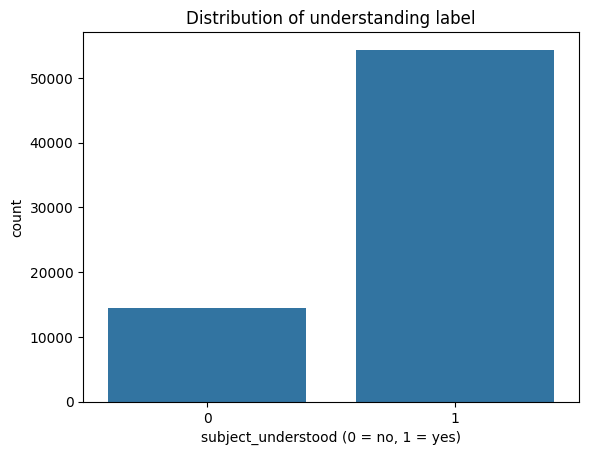

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=target_col, data=df)
plt.title("Distribution of understanding label")
plt.xlabel("subject_understood (0 = no, 1 = yes)")
plt.show()


comment: The target label subject_understood is moderately imbalanced, with more “understood” than “not understood” trials, so naive baselines already achieve relatively high accuracy.

In [38]:
df[target_col].value_counts(normalize=True)

subject_understood
1    0.789906
0    0.210094
Name: proportion, dtype: float64

### Histograms of EEG channels

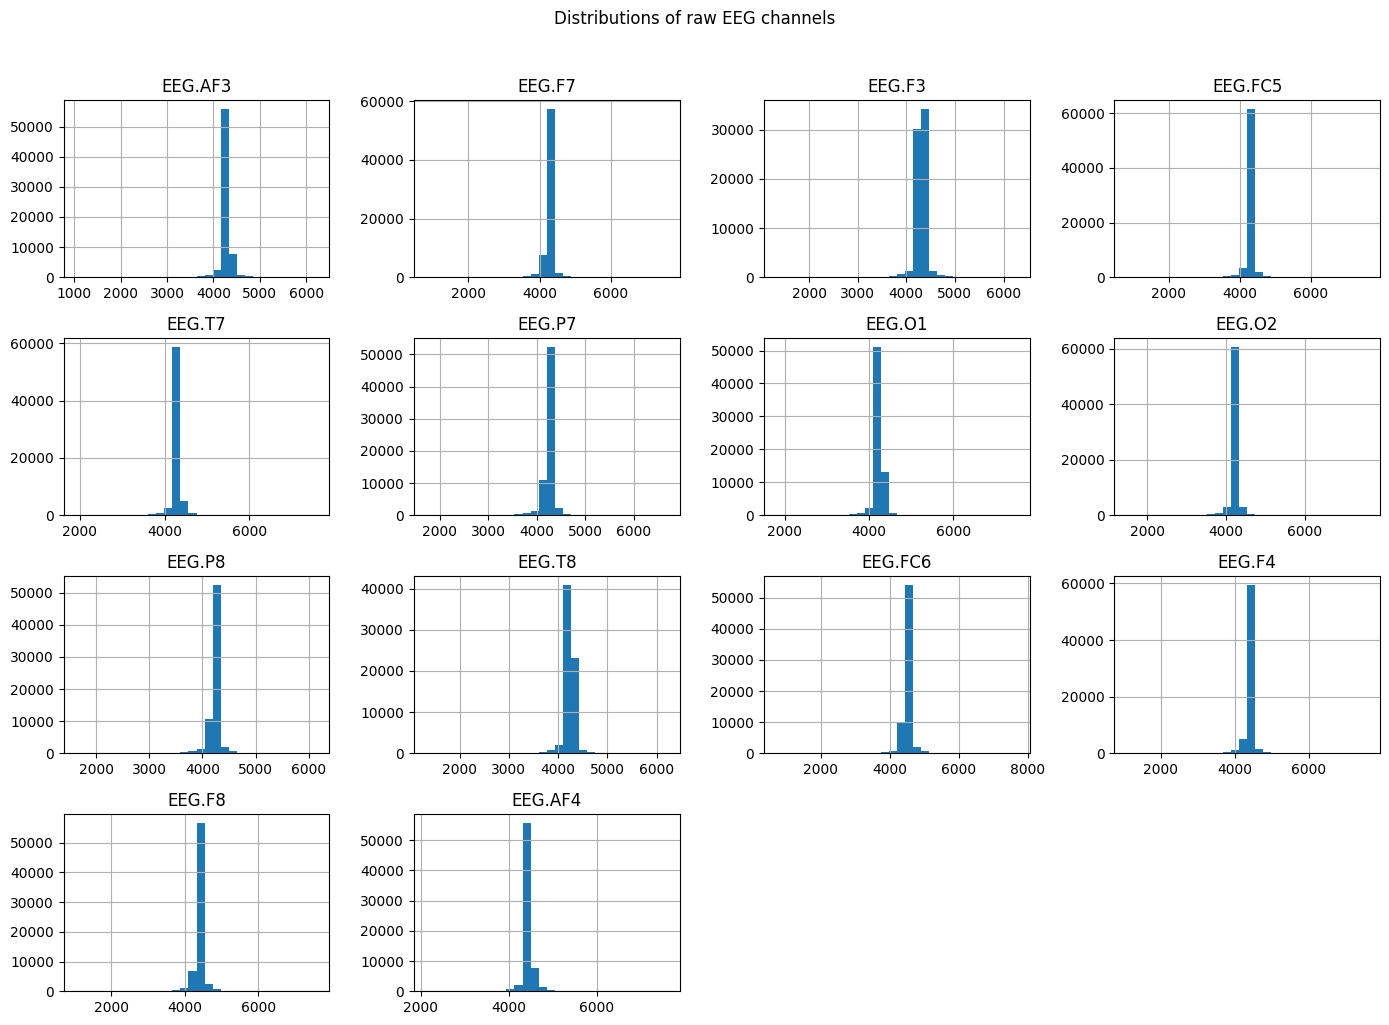

In [39]:
df[eeg_cols].hist(bins=30, figsize=(14, 10))
plt.suptitle("Distributions of raw EEG channels", y=1.02)
plt.tight_layout()
plt.show()

### Short time-series preview (EEG feeling)

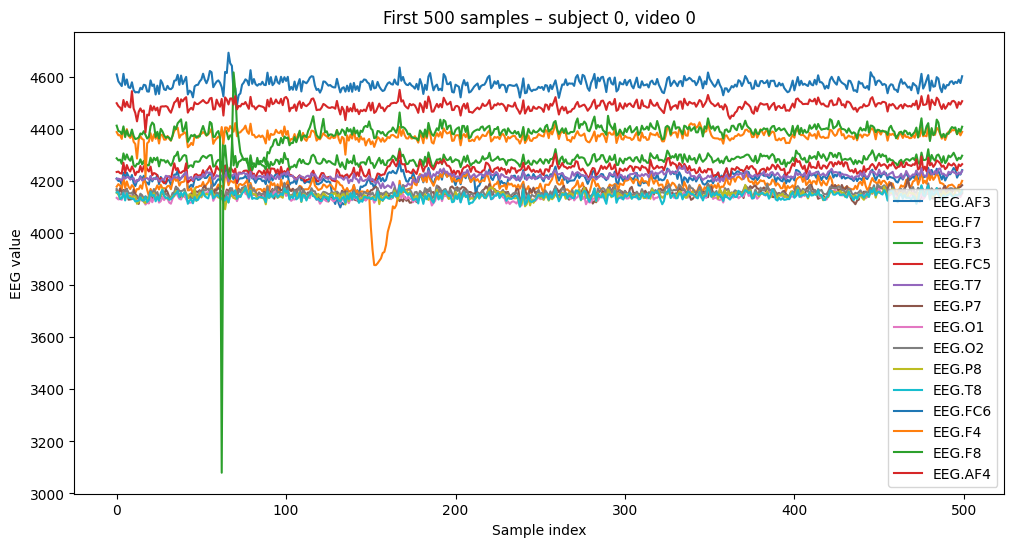

In [40]:
example = df[(df["subject_id"] == 0) & (df["video_id"] == 0)]

example[eeg_cols].iloc[:500].plot(figsize=(12, 6))
plt.title("First 500 samples – subject 0, video 0")
plt.xlabel("Sample index")
plt.ylabel("EEG value")
plt.show()


### Correlation heatmap between channels

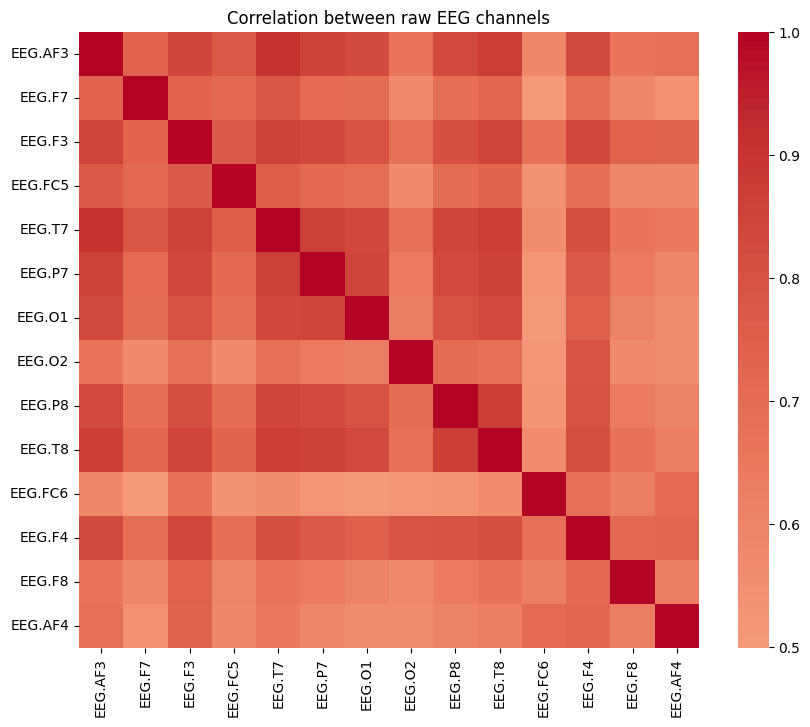

In [41]:
corr_eeg = df[eeg_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_eeg, cmap="coolwarm", center=0)
plt.title("Correlation between raw EEG channels")
plt.show()


### Which features relate to “understanding”?

In [42]:
# We want to see which numerical features are most correlated
# with the target label "subject_understood".
# For now we consider all EEG channels and power features as numeric.
num_cols = eeg_cols + pow_cols   # optionally: + ["Age"]

# Compute Pearson correlation matrix for [all features + target],
# then select the column corresponding to the target.
corr_with_target = (
    df[num_cols + [target_col]]
    .corr()[target_col]          # take correlations with subject_understood
    .drop(target_col)            # remove the self-correlation
    .sort_values(ascending=False)
)

# Show the top 15 features most positively correlated with understanding.
corr_with_target.head(15)

EEG.T8           0.213057
EEG.O1           0.192482
EEG.P8           0.181317
EEG.P7           0.179932
EEG.T7           0.167034
EEG.O2           0.157495
EEG.AF3          0.139518
EEG.F7           0.127828
EEG.FC5          0.091023
EEG.F4           0.075343
EEG.F3           0.066442
POW.P7.Gamma     0.024402
POW.P8.Gamma     0.017826
POW.AF4.Alpha    0.013707
EEG.F8           0.013234
Name: subject_understood, dtype: float64

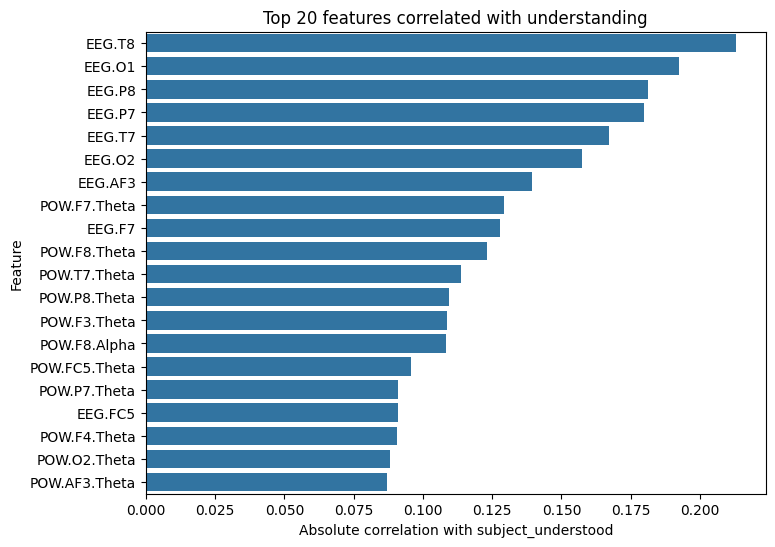

In [43]:
# Take the 20 features with largest absolute correlation (positive or negative)
top_features = corr_with_target.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 features correlated with understanding")
plt.xlabel("Absolute correlation with subject_understood")
plt.ylabel("Feature")
plt.show()

# Interpretation:
#   - bars further to the right are more strongly related to the label.
#   - this helps us see which EEG bands/channels might be useful features.

### Boxplots: how do EEG features differ between understood vs not?

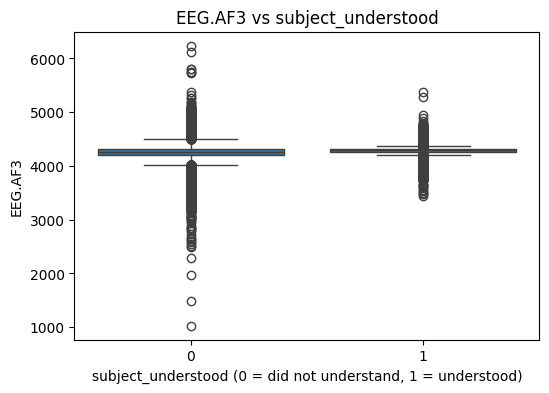

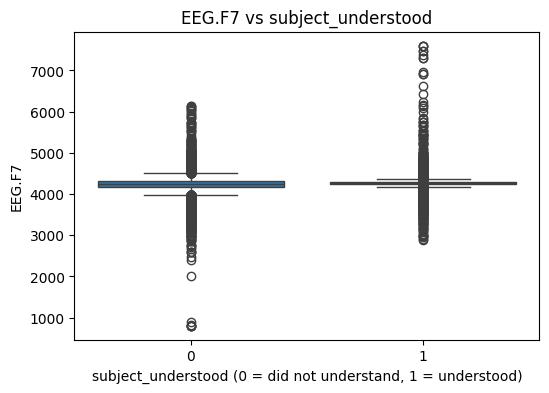

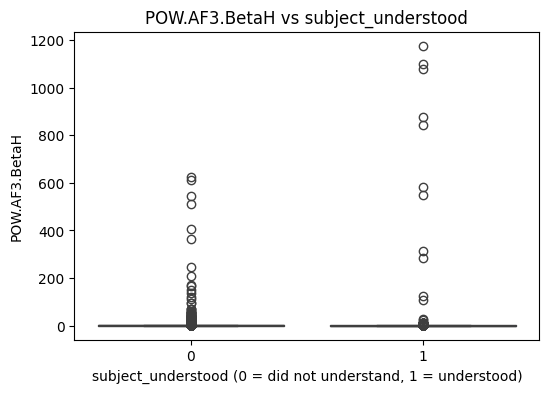

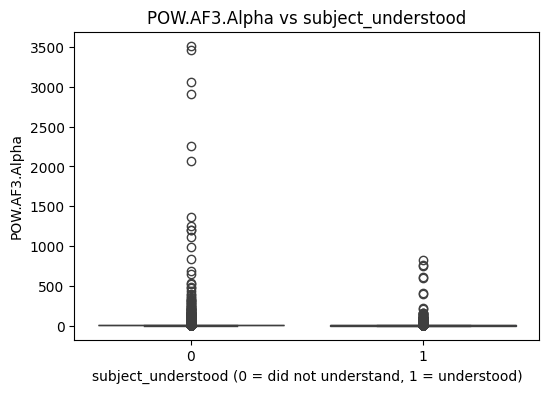

In [44]:
# Look at the distribution of a few important EEG features,
# split by whether the subject understood the content (0/1).
# These should ideally be picked based on corr_with_target (highest correlations).
important_cols = ["EEG.AF3", "EEG.F7", "POW.AF3.BetaH", "POW.AF3.Alpha"]

for col in important_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs subject_understood")
    plt.xlabel("subject_understood (0 = did not understand, 1 = understood)")
    plt.ylabel(col)
    plt.show()

    # If the medians or distributions differ clearly between 0 and 1,
    # this feature may be helpful for classification.

### Effects of Gender or Age

#### a) Gender proportions

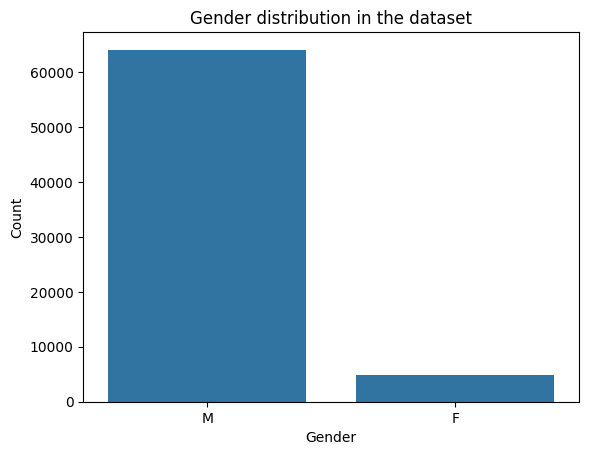

In [45]:
# a) Gender proportions in the merged dataset
sns.countplot(x="Gender", data=df)
plt.title("Gender distribution in the dataset")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

#### b) Understanding vs Gender

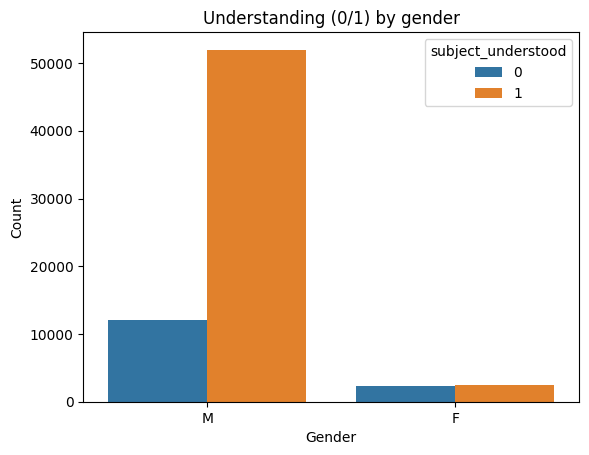

In [46]:
# b) Understanding vs Gender:
#    stacked counts for (Gender, subject_understood)
sns.countplot(x="Gender", hue=target_col, data=df)
plt.title("Understanding (0/1) by gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# This lets us see if one gender has a noticeably higher/lower understanding rate.

#### c) Age vs Understanding

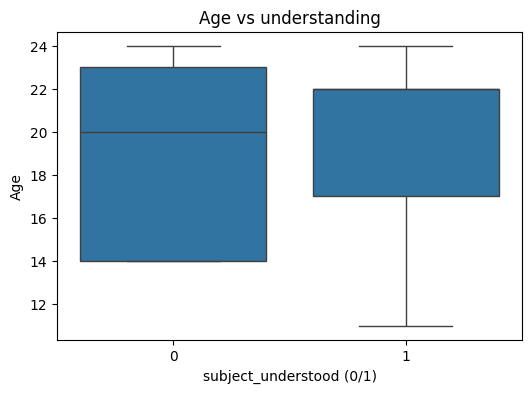

In [47]:
# c) Age vs understanding:
#    Are subjects who understood generally older/younger?
plt.figure(figsize=(6, 4))
sns.boxplot(x=target_col, y="Age", data=df)
plt.title("Age vs understanding")
plt.xlabel("subject_understood (0/1)")
plt.ylabel("Age")
plt.show()

## Video/topic effects

In [48]:
# Compute the mean understanding label per lecture Title.
# This is basically:
#   proportion of rows where subject_understood == 1 for each video.
understanding_by_video = (
    df.groupby("Title")[target_col]
      .mean()
      .sort_values(ascending=False)
)

understanding_by_video   # display table

Title
Classical Mythology            1.0
General Biology                1.0
Linear Algebra 2               1.0
Statistics                     1.0
Numbers and Operations         1.0
Photosynthesis                 1.0
Ratios, Rates & Percentages    1.0
Computational Geometry         0.0
Linear Algebra 1               0.0
Quantum Physics                0.0
String Theory                  0.0
Name: subject_understood, dtype: float64

comment: It turns out that for most of the classes people either understood class fully (1.00000 or didn't understand (0.00000)). Only for Linear Algebra we have half-half split. I checked that there are two videos of Linear Algebra. Let me check if the distibution os also 1.0 for both of videos. 

This means that there is no point of learning our model using different classes because the model will learn to predict 0/1 using class label, and not EEG data. Hence, I need to change my research question to something different.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the three CSVs (you could also reuse df1, df2, df3 from above)
eeg = pd.read_csv("data/raw/EEG_data.csv")
subjects = pd.read_csv("data/raw/Subject_details.csv")
videos = pd.read_csv("data/raw/Video_details.csv")

# 1) Merge row-level EEG data with subject metadata.
#    Keys:
#       EEG_data:       subject_id
#       Subject_details: Subject_ID
#    We keep all EEG rows (how="left") and attach subject info where available.
df = eeg.merge(
    subjects,
    left_on="subject_id",
    right_on="Subject_ID",
    how="left"
)

# 2) Merge with video metadata.
#    Keys:
#       EEG_data:     video_id
#       Video_details: Video_ID
#    This adds Title / Instructor / URL to each EEG row.
df = df.merge(
    videos,
    left_on="video_id",
    right_on="Video_ID",
    how="left"
)

In [ ]:
import pandas as pd
import numpy as np

# all raw EEG channel values
eeg_cols = [c for c in df.columns if c.startswith("EEG.")]

# mean of each EEG channel per course title
means_by_course = df.groupby("Title")[eeg_cols].mean()

# variance of the average EEG channel values across different courses
# higher variace means the channel is more "sensitive" to the type of course
variance_across_courses = means_by_course.var(axis=0).sort_values(ascending=False)

variance_across_courses

EEG.O1     2451.651172
EEG.P7     2247.016754
EEG.T7     2056.089655
EEG.P8     2048.171249
EEG.O2     2042.914079
EEG.F7     1668.601934
EEG.T8     1660.199312
EEG.FC6    1624.144309
EEG.AF3    1239.842020
EEG.FC5     677.794793
EEG.AF4     573.974668
EEG.F4      210.589154
EEG.F3      173.667474
EEG.F8       26.692454
dtype: float64

### Selecting EEG channels that differ most between courses

To reduce the number of plots, I first compute the mean value of each EEG channel
for every course (`Title`) and then measure how much these means vary across courses.
I then select the top 5 channels with the largest variance, as they are potentially
the most informative for comparing lecture topics.


In [54]:
top_channels = variance_across_courses.head(5).index.tolist()
top_channels

['EEG.O1', 'EEG.P7', 'EEG.T7', 'EEG.P8', 'EEG.O2']

I'm choosing the channels whose mean values differ the most between courses, so they are the most informative for exploring differences between lecture topics.

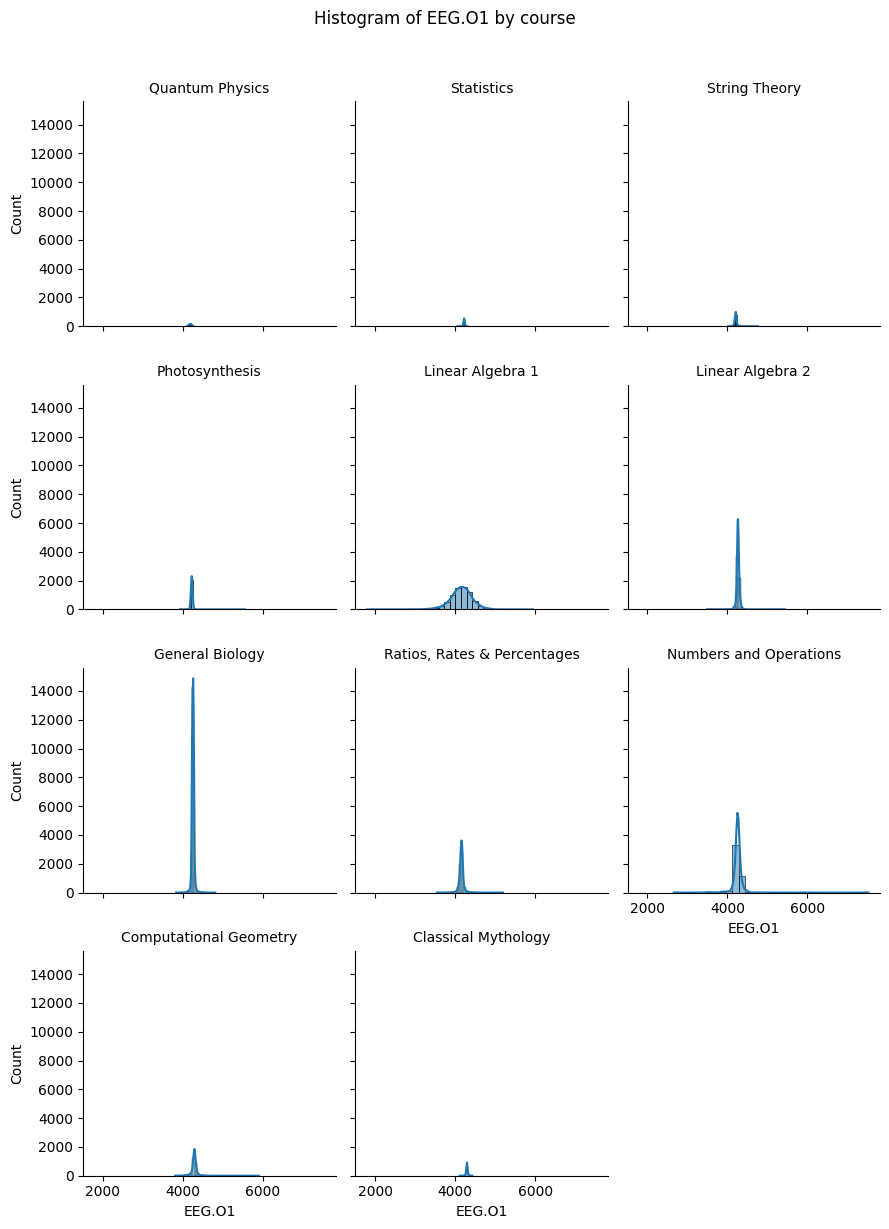

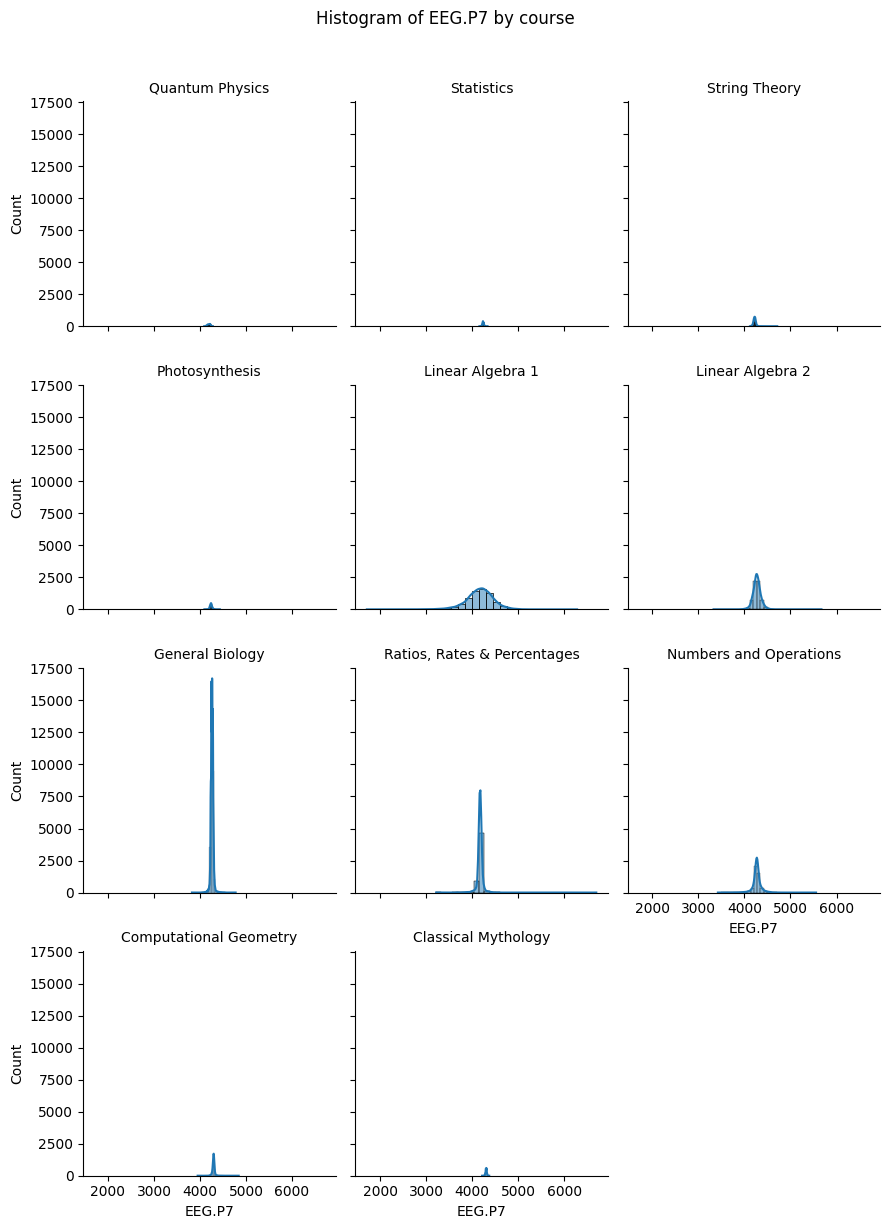

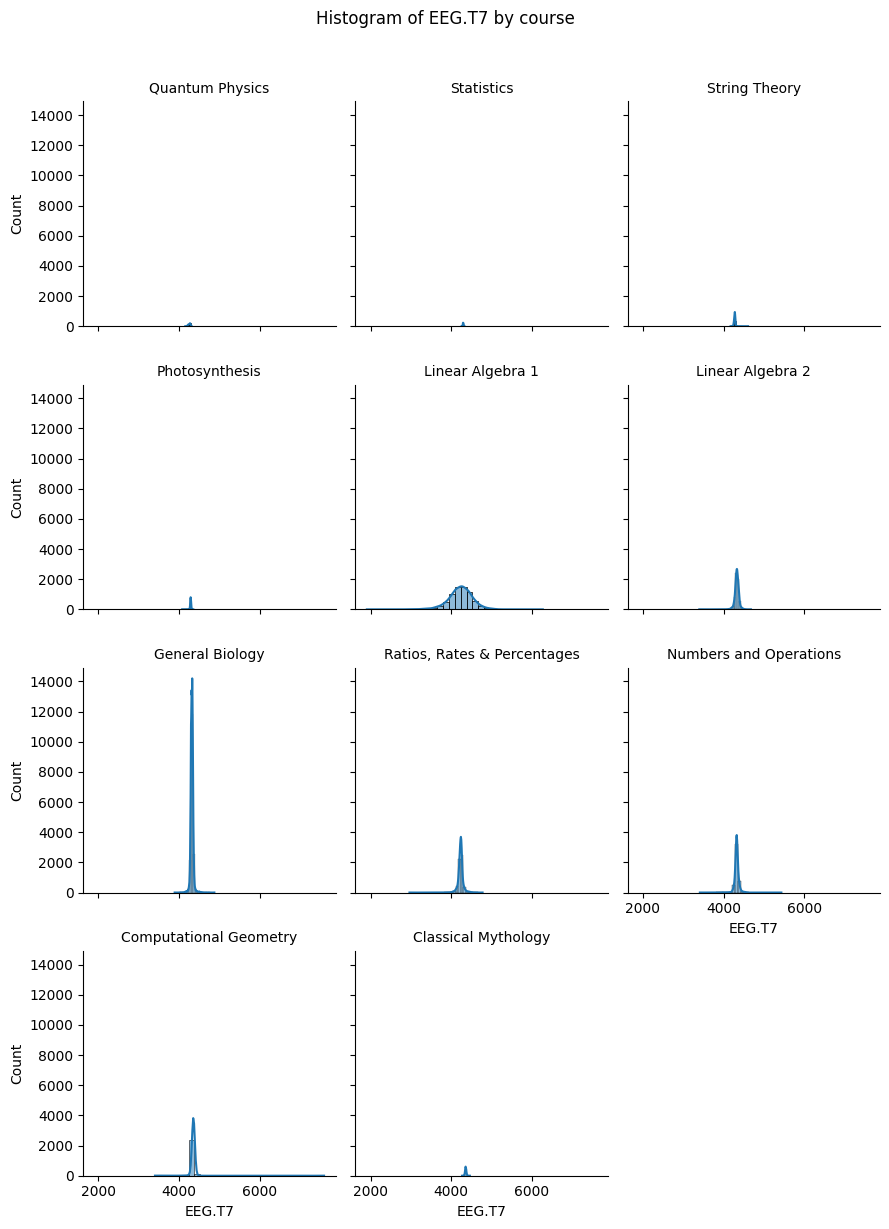

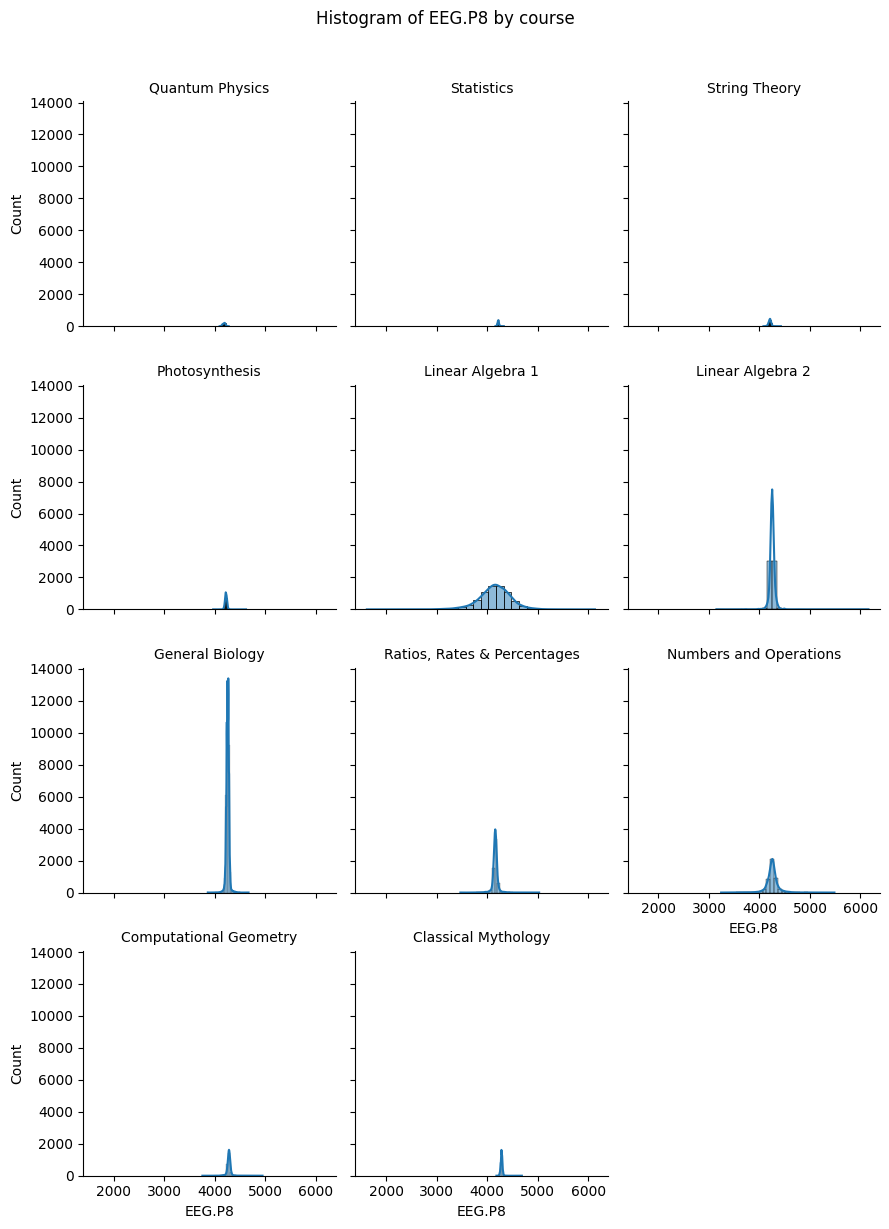

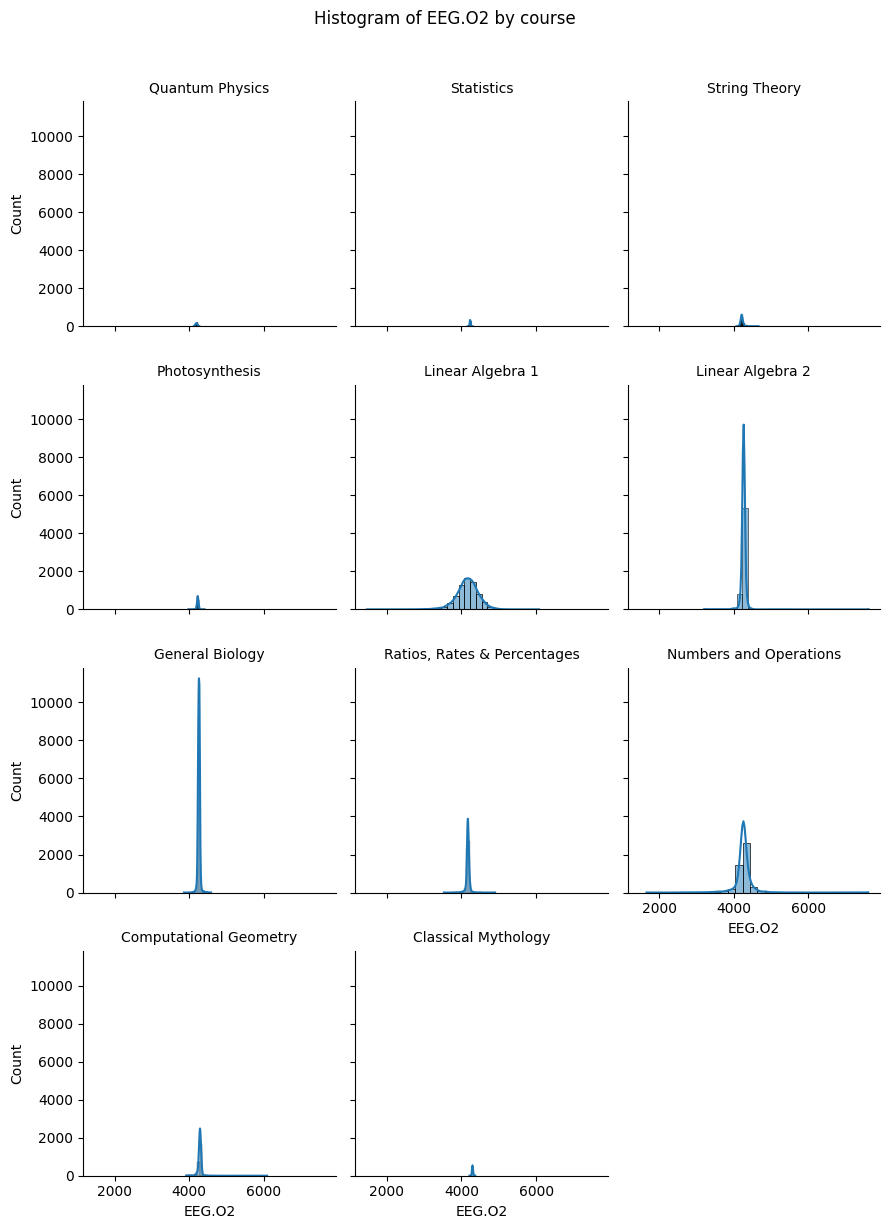

In [55]:
# Funkcja rysująca histogramy dla jednego kanału EEG, rozbite wg tytułu zajęć
def plot_histograms_by_course(df, channel, col_wrap=3, bins=30):
    """
    Plot histograms of `channel` for each course (Title) using FacetGrid.
    """
    if channel not in df.columns:
        print(f"Column {channel} not in dataframe.")
        return
    
    g = sns.FacetGrid(
        df,
        col="Title",
        col_wrap=col_wrap,
        sharex=True,   # ten sam zakres osi X dla wszystkich kursów
        sharey=True    # ten sam zakres osi Y
    )
    g.map(sns.histplot, channel, bins=bins, kde=True)
    g.set_titles(col_template="{col_name}")
    g.fig.suptitle(f"Histogram of {channel} by course", y=1.02)
    g.set_xlabels(channel)
    g.set_ylabels("Count")
    plt.tight_layout()
    plt.show()

selected_channels = top_channels
for ch in selected_channels:
    plot_histograms_by_course(df, ch, col_wrap=3, bins=30)


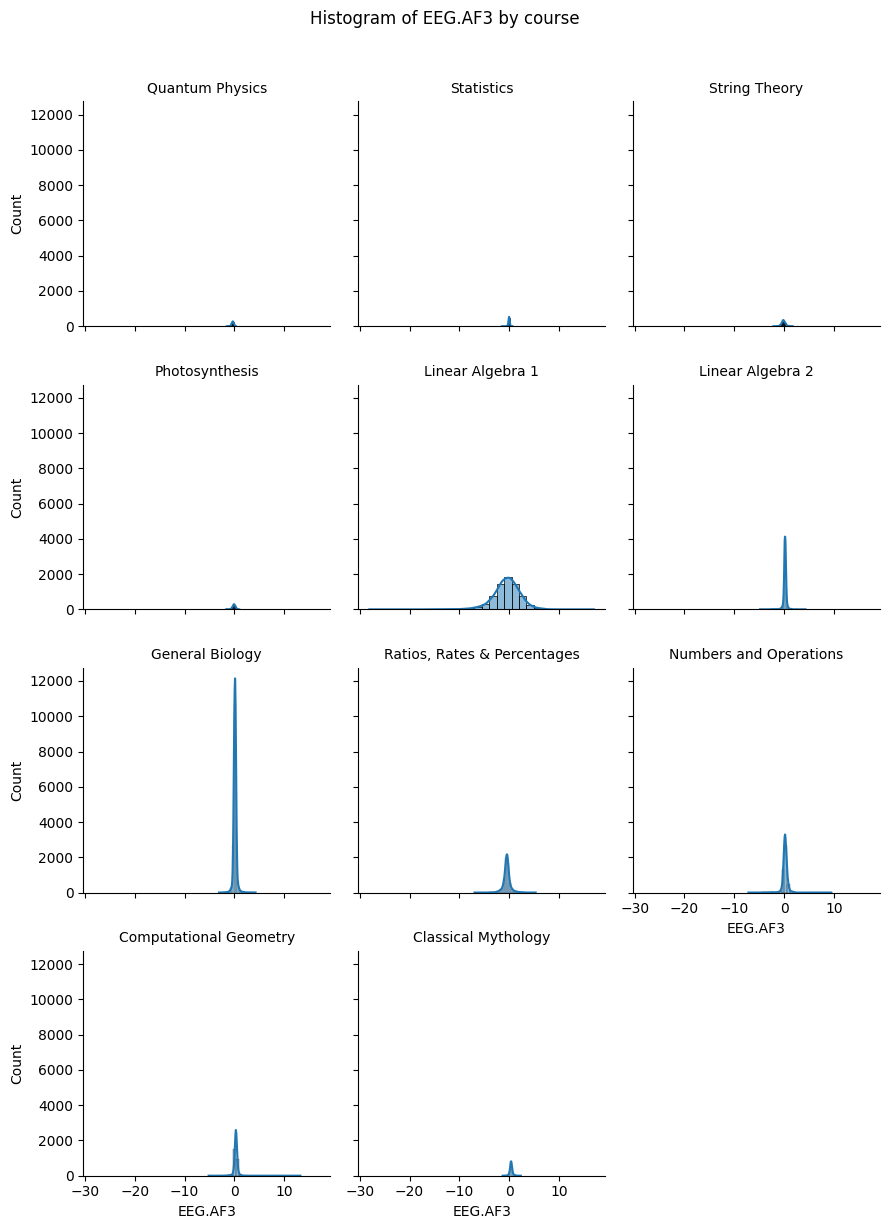

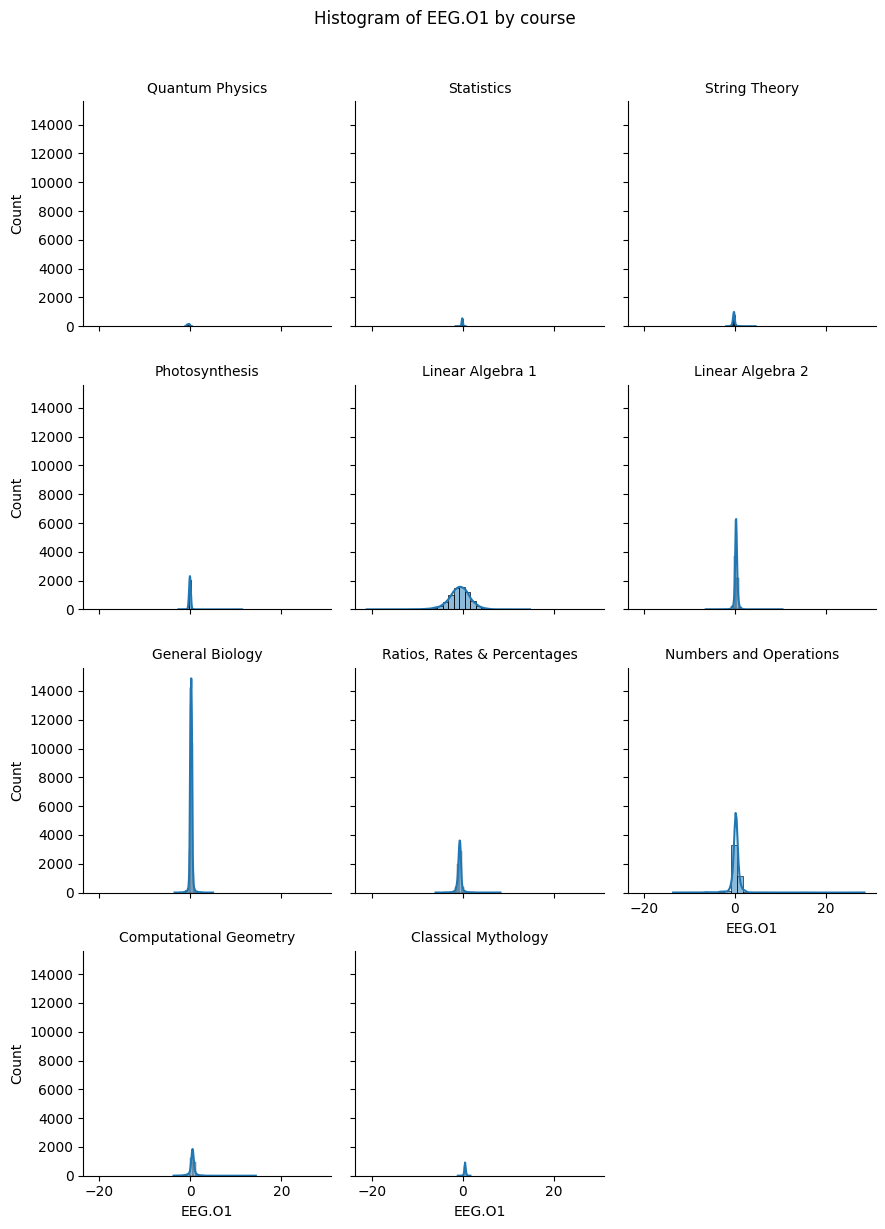

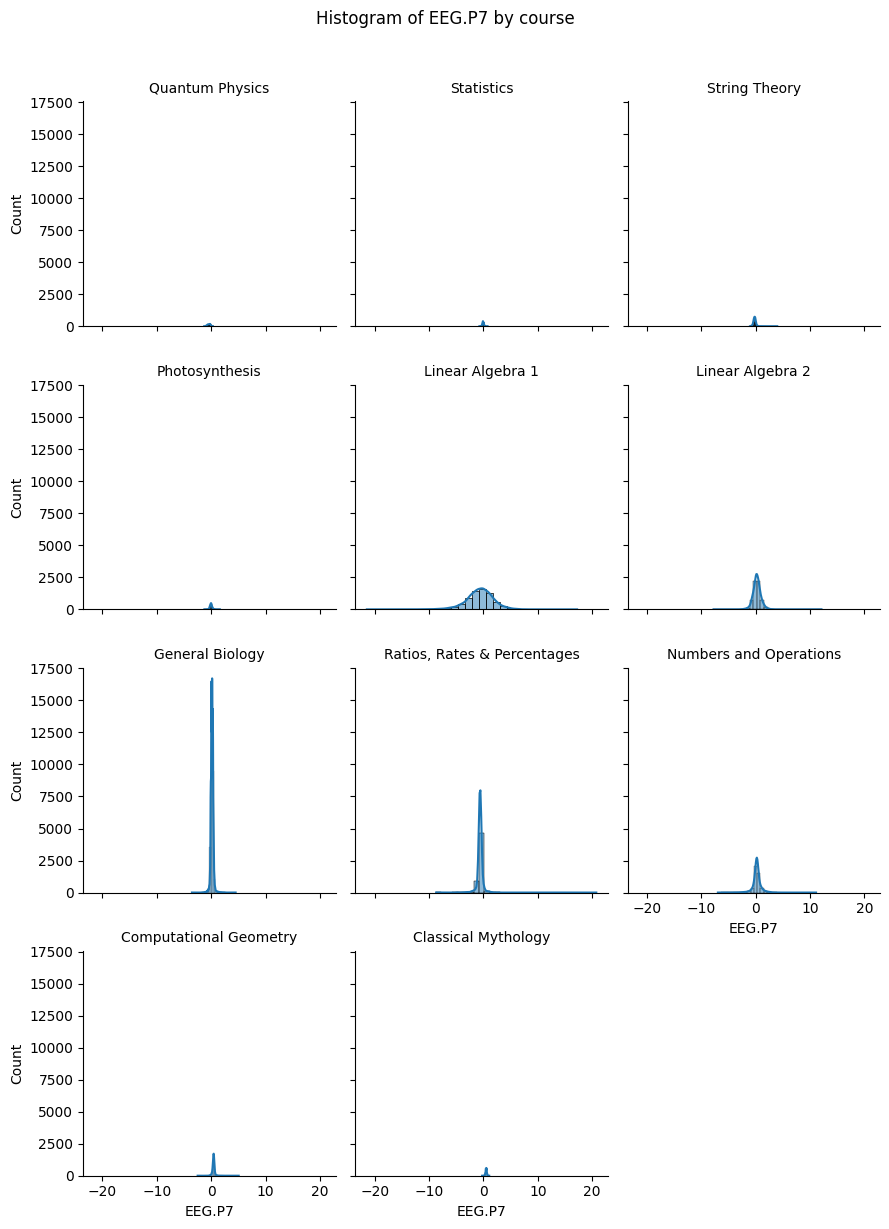

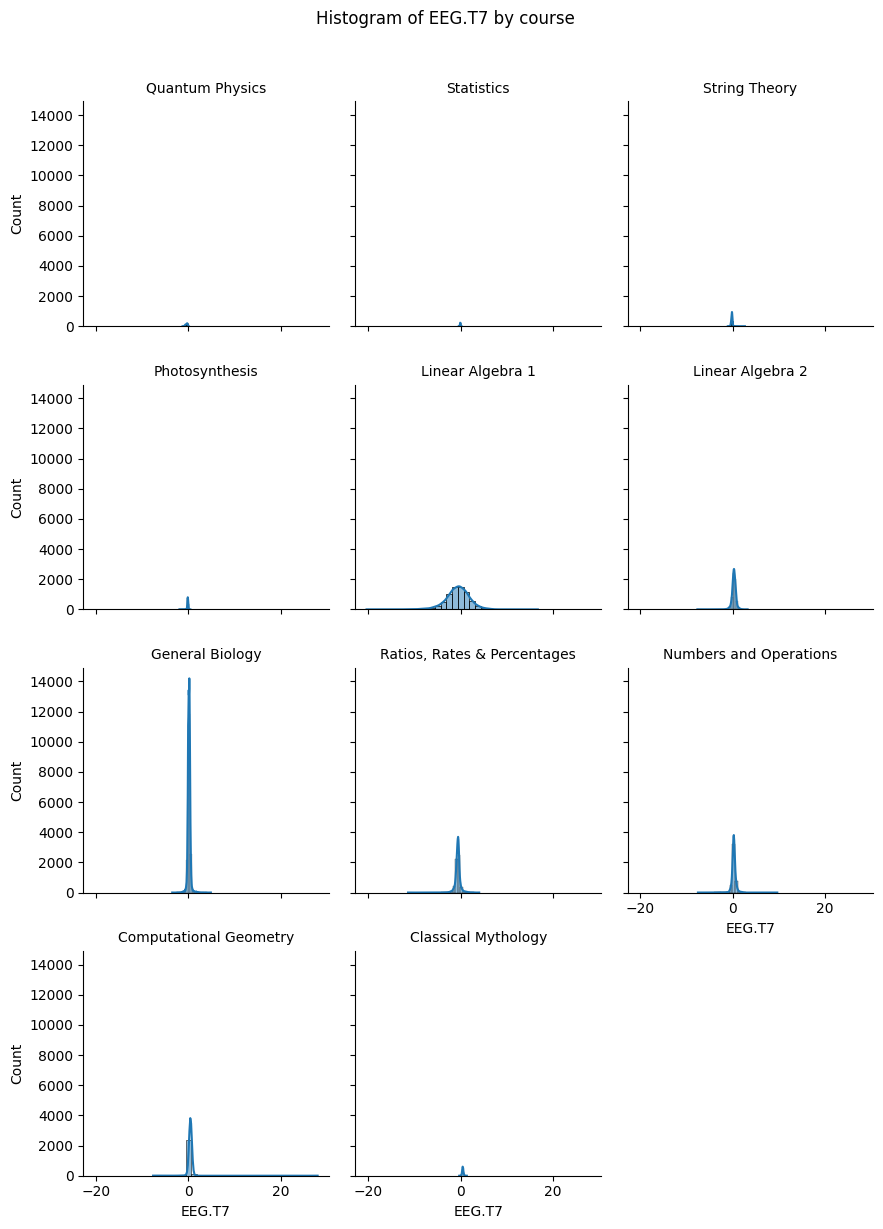

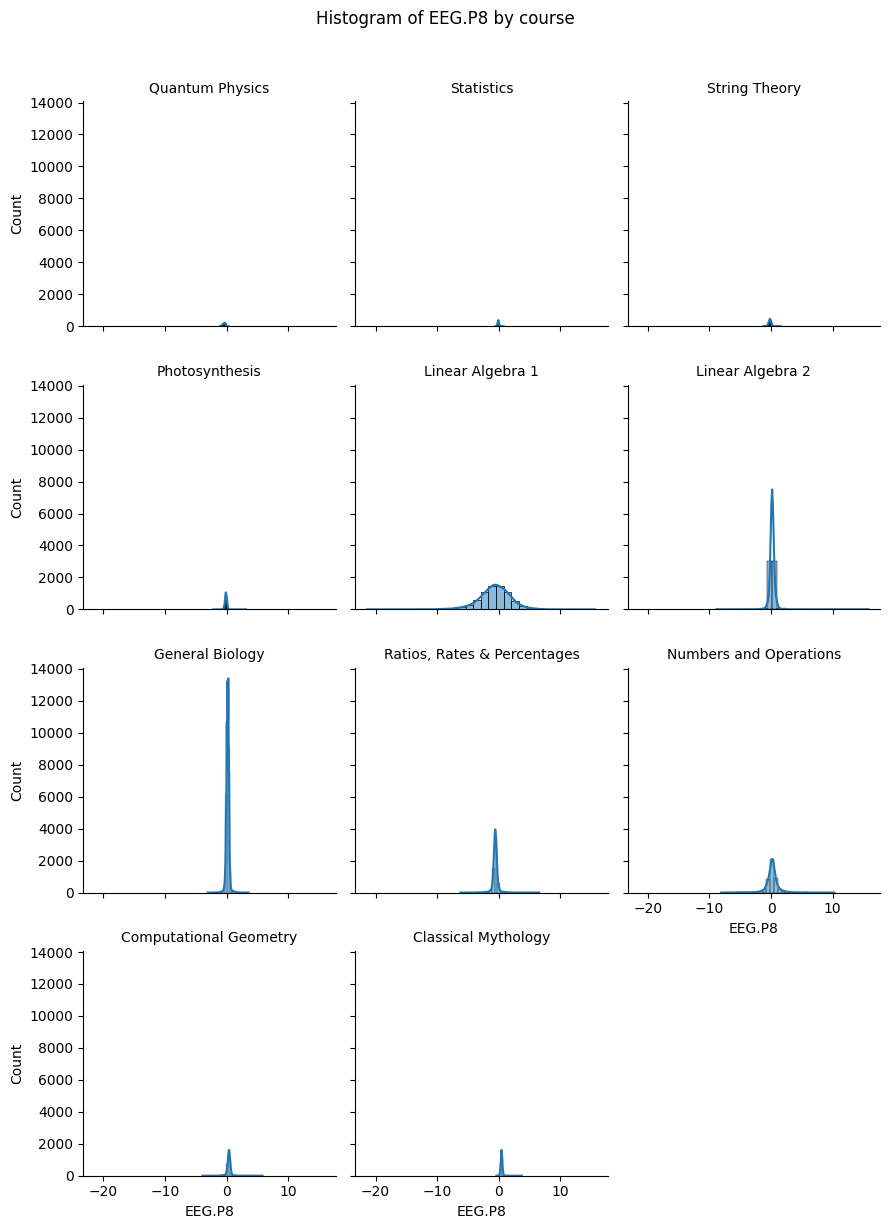

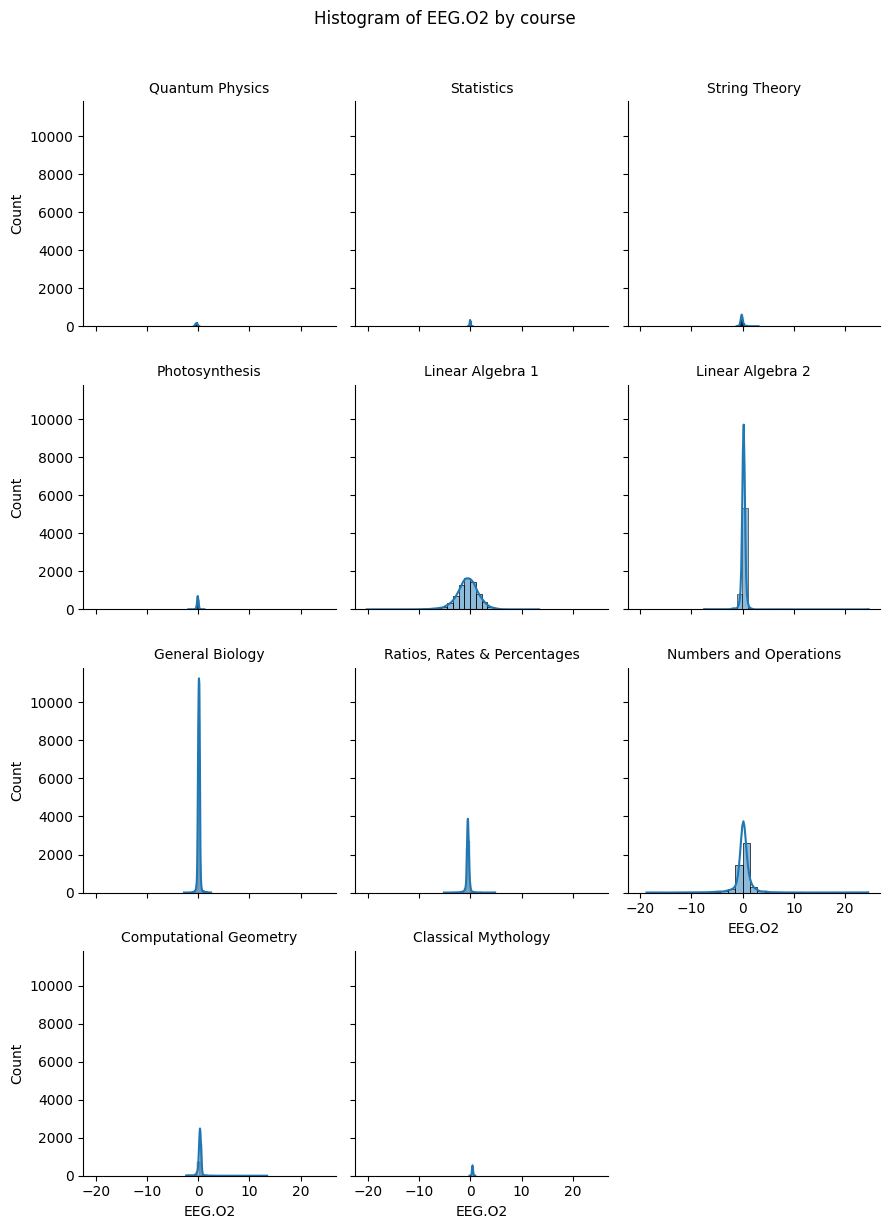

In [56]:
from sklearn.preprocessing import StandardScaler

# Kopia df, żeby nie nadpisać oryginału
df_z = df.copy()

# Standaryzacja kanałów EEG: (x - mean) / std
scaler = StandardScaler()
df_z[eeg_cols] = scaler.fit_transform(df_z[eeg_cols])

# Teraz możesz rysować histogramy dokładnie tak jak wcześniej, ale z df_z
plot_histograms_by_course(df_z, "EEG.AF3", col_wrap=3, bins=30)

# Możesz też zrobić pętlę po kilku kanałach:
for ch in selected_channels:
    plot_histograms_by_course(df_z, ch, col_wrap=3, bins=30)


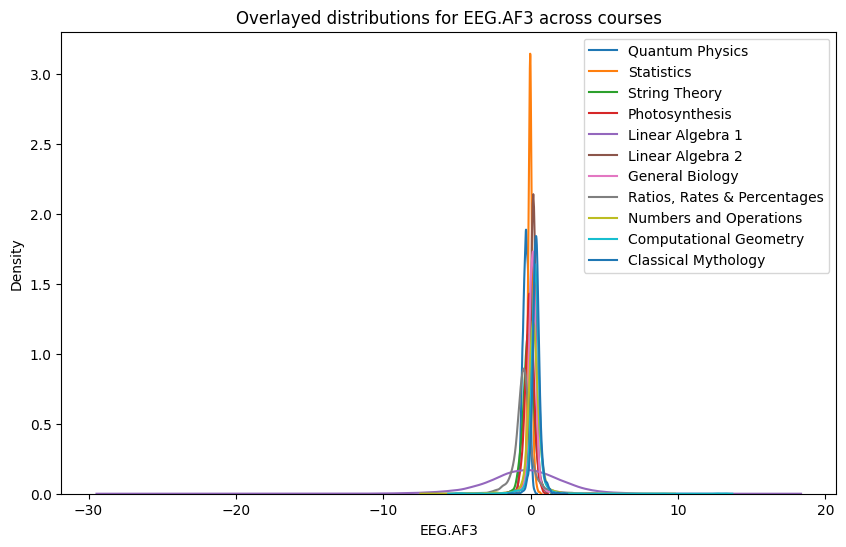

In [57]:
def overlay_histograms_for_channel(df, channel, titles=None, bins=30):
    """
    Overlay histograms / KDE for different courses on one plot for a given channel.
    """
    if titles is None:
        titles = df["Title"].unique()
    
    plt.figure(figsize=(10, 6))
    for title in titles:
        subset = df[df["Title"] == title]
        sns.kdeplot(subset[channel], label=title, fill=False)  # możesz zmienić na histplot
    
    plt.title(f"Overlayed distributions for {channel} across courses")
    plt.xlabel(channel)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Przykład dla kanału EEG.AF3 na danych znormalizowanych
overlay_histograms_for_channel(df_z, "EEG.AF3")


### Visual comparison of EEG distributions across courses

For the five EEG channels that showed the largest between-course variance
(O1, P7, T7, P8, O2), I plotted per-course histograms. All channels exhibit
unimodal and fairly narrow distributions for each lecture. Some courses (e.g.,
*Linear Algebra 1*) show slightly wider distributions, and there are small
shifts in the mean level between topics, but overall the histograms largely
overlap.

After z-score normalisation, the overlaid density plots for channel AF3 show
almost identical shapes across courses. This suggests that, at the level of
single-channel marginal distributions, lecture topic has only a subtle effect
on the EEG signal, and no single sensor cleanly separates courses.


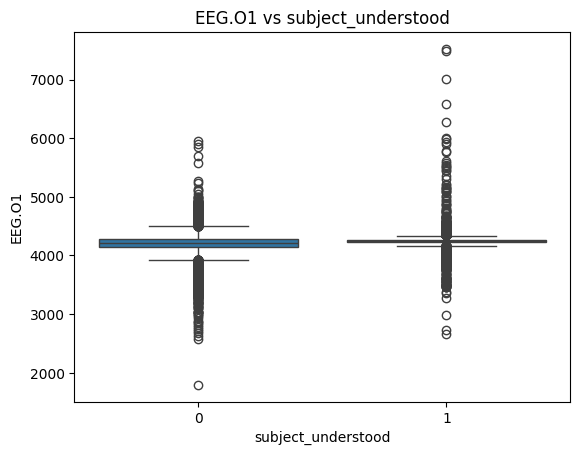

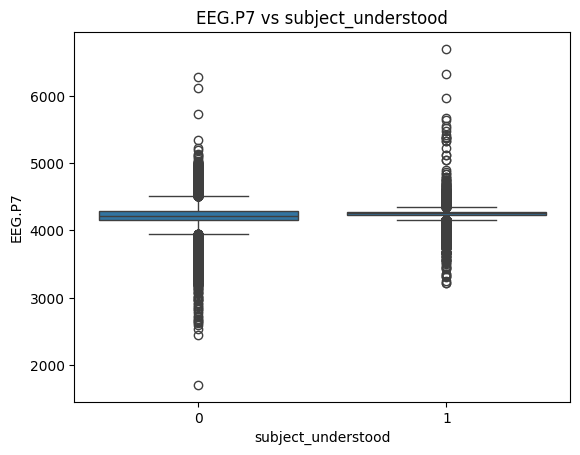

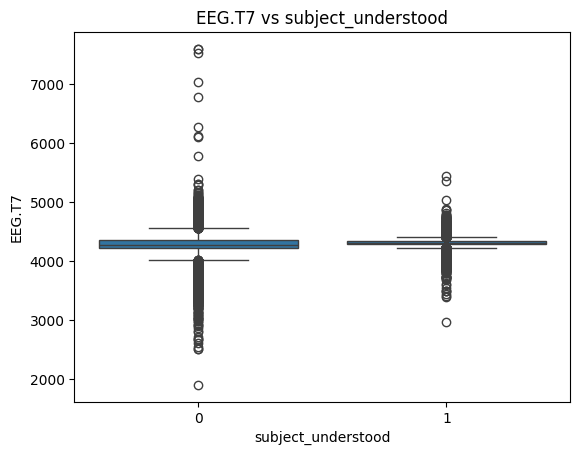

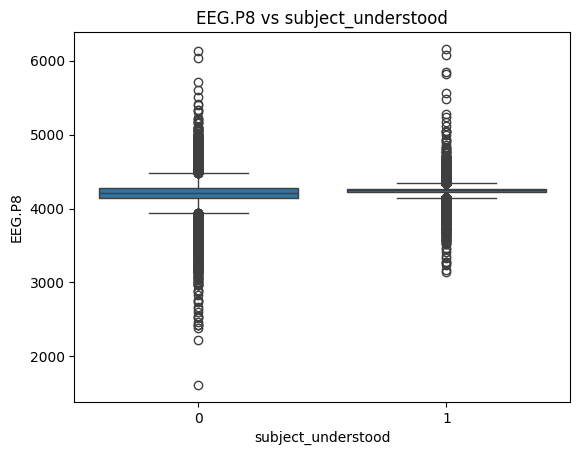

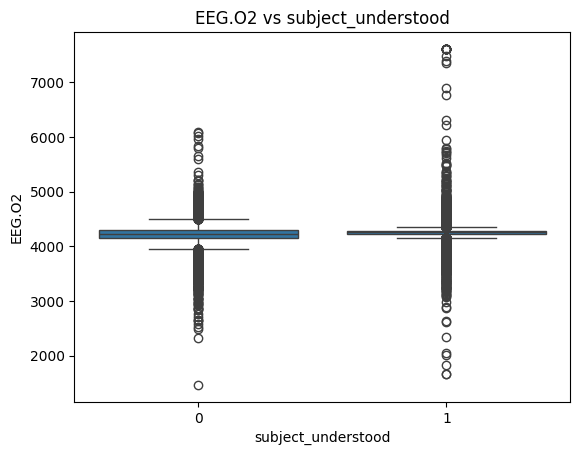

In [58]:
for ch in top_channels:
    sns.boxplot(data=df, x="subject_understood", y=ch)
    plt.title(f"{ch} vs subject_understood")
    plt.show()


In [59]:
correlations_with_target = df[eeg_cols + ["subject_understood"]].corr()["subject_understood"].sort_values()
correlations_with_target

EEG.FC6              -0.082203
EEG.AF4              -0.060087
EEG.F8                0.013234
EEG.F3                0.066442
EEG.F4                0.075343
EEG.FC5               0.091023
EEG.F7                0.127828
EEG.AF3               0.139518
EEG.O2                0.157495
EEG.T7                0.167034
EEG.P7                0.179932
EEG.P8                0.181317
EEG.O1                0.192482
EEG.T8                0.213057
subject_understood    1.000000
Name: subject_understood, dtype: float64

In [61]:
df.groupby("subject_understood")[top_channels].agg(['mean','std'])


EEG.O1                   EEG.P7              \
                           mean         std         mean         std   
subject_understood                                                     
0                   4188.705804  205.794255  4202.162455  216.514176   
1                   4243.321365   70.884213  4254.364915   68.146420   

                         EEG.T7                   EEG.P8              \
                           mean         std         mean         std   
subject_understood                                                     
0                   4263.964133  228.613815  4186.032045  230.989089   
1                   4312.234871   56.180959  4240.328713   63.485725   

                         EEG.O2              
                           mean         std  
subject_understood                           
0                   4198.203833  219.852044  
1                   4251.310840  102.180417

In [60]:
features = eeg_cols + pow_cols


### Final feature set
The final feature set includes all raw EEG channels (`EEG.*`) and all frequency-band
power features (`POW.*`). No manual feature removal was performed at this stage,
because subtle effects distributed across multiple sensors are expected, and
model-based feature selection will be applied in Week 3.


In [ ]:
from sklearn.model_selection import GroupShuffleSplit

X = df[features]
y = df['subject_understood']
groups = df['subject_id']

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

### EDA: short summary

- Label 'subject_understood' is not balances (around 79% -> 1)
- the label is not changing depending on the subject -> all students understand/or not understand -> there is a risk that the model will learn `Title`, `video_id`, and not EEG results
- one dimension distributions of canals EEG and power of bands are quite similar between courses; a single canal does not separate the topics of classes.
- for the future modeling, I'm taking all features `EEG.*` and `POW.*`, I will work on feature selection in the week 3
- in my modeling, I will be dividing my train/test based on **subject_id** to 

## Consultation with TA -> change of tactic
Since I have unbalanced data, but it still can predict whether student understood material or not, I'm going to check 2 different approaches to check how my data can be split.

### Problems

**Problem 1:** label `subject_understood` not balanced 

**Solution:** I'm going to use balanced weights (give more weight to subject not understood as now it's 20% and we want it to have the same probability)

**Problem 2:** the label it's not changing depending on the subject.

**Solution:** I will substract 'video_id' from my model and will be analysing only raw EEG data and how it correlates with understanding.

### Approaches
**Assumption:** For my train/test I will use proportion 80/20 (randomized), with no k-cross validation as I have a lot of data. Then from train I will get 80/20 proportion for train-validation.
1. clustering
I will try to use `t_sne` fuction and lower down all of my cathegories into 2-dimensional problem. Then, I will search for clustering patterns to see if the data will be potentially split into `understaning`/`not_understanding` or maybe it can be defined as different subjects.
2. classification
I have in my mind 3 different approaches of whan models I could use. For each model I will give a confusion matrix. Since I have a lot of data, for now I will not do any feature selection.
* XG Boost - if I get the accuracy high enough, I can stick with this solution.
* FNN - a regular one
* CNN - where I create a picture with sensors in raws and features (waves) for each feature in coulumns, and then check if the pictures will be similar depending on `understanding`/`not_undestanding`.

below is summary corrected to look nice 

## Consultation with TA → change of tactic

Based on the EDA and the meeting with the TA, I will slightly change the focus of my analysis.  
The main goal now is **not** to achieve the highest possible accuracy, but to reason correctly about
what the model is actually learning and how the data should be used.

### Problems

**Problem 1 – Imbalanced target (`subject_understood`)**

The label `subject_understood` is imbalanced: about 79% of the samples are `1` (understood) and
about 21% are `0` (not understood). This means that a trivial baseline that always predicts `1`
would already achieve relatively high accuracy.

**Planned solution:**  
For some of the classification models I plan to use class weights (give more weight to the
minority class “not understood”), so that the model does not completely ignore the 0-class.

---

**Problem 2 – Strong dependence on video**

EDA shows that `subject_understood` is almost constant within each video (some lectures have
all `1`s, others all `0`s). This means there is a strong risk that a model would simply learn
to recognize the lecture (video) instead of learning anything meaningful about understanding.

**Planned solution:**  
In the modeling phase I will **exclude** `video_id`, `subject_id` and high-level video metadata
from the feature set. The models will only use EEG-based features (`EEG.*`, `POW.*`) to see
whether there is any signal related to `subject_understood` that is not directly tied to the
video identity. If the models still perform well, I will have to interpret this very carefully
because subtle differences in EEG between lectures may still be driving the predictions.

---

### Approaches

**Assumption:**  
For the initial experiments I will use an 80/20 train–test split (randomized), with a
subject-wise split so that the same student does not appear in both sets. From the
training set I may further split off a small validation set (e.g. 80/20). The focus
is not on maximizing accuracy at all costs, but on understanding what the models
are actually learning.

1. **Clustering and visualization**

I will use dimensionality reduction (e.g. t-SNE or PCA) on the EEG features to project
the data into 2D and visualize the structure. The goal is not to “discover perfect
understood / not understood clusters”, but rather to see:

- whether samples cluster by lecture topic,
- whether there are visible groups of similar EEG patterns.

This will help interpret later classification results.

2. **Standard classification models**

I will treat `subject_understood` as a supervised classification problem, with the
important caveat that the label is highly correlated with the lecture. I plan to try
several standard models (without manual feature selection at this stage):

- a tree-based model such as XGBoost,
- a simple feed-forward neural network.

For each model I will report accuracy vs. a dummy baseline and show a confusion matrix,
emphasizing interpretation rather than raw performance.

3. **CNN on 2D EEG "images" (exploratory)**

As an exploratory extension, I plan to construct small 2D “images” from the EEG power
features by arranging sensors as rows and frequency bands (Delta/Theta/Alpha/Beta/Gamma)
as columns. Each sample then becomes a matrix of band power values, which can be fed to
a simple 2D CNN.

The idea is to see whether a convolutional model can exploit the spatial structure
(sensor × frequency band) more effectively than fully-connected models. Because the
images are small and the label is confounded by lecture topic, this experiment will
be interpreted cautiously and mainly as a way to learn how to design and evaluate
a CNN-based approach.



ważne dane: (do kopiowania później)

Title

Classical Mythology            1.0

General Biology                1.0

Linear Algebra 2               1.0

Statistics                     1.0

Numbers and Operations         1.0

Photosynthesis                 1.0

Ratios, Rates & Percentages    1.0

Computational Geometry         0.0

Linear Algebra 1               0.0

Quantum Physics                0.0

String Theory                  0.0

Name: subject_understood, dtype: float64

In [ ]:
Title
Classical Mythology            1.0
General Biology                1.0
Linear Algebra 2               1.0
Statistics                     1.0
Numbers and Operations         1.0
Photosynthesis                 1.0
Ratios, Rates & Percentages    1.0
Computational Geometry         0.0
Linear Algebra 1               0.0
Quantum Physics                0.0
String Theory                  0.0
Name: subject_understood, dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the three CSVs (you could also reuse df1, df2, df3 from above)
eeg = pd.read_csv("data/raw/EEG_data.csv")
subjects = pd.read_csv("data/raw/Subject_details.csv")
videos = pd.read_csv("data/raw/Video_details.csv")

# 1) Merge row-level EEG data with subject metadata.
#    Keys:
#       EEG_data:       subject_id
#       Subject_details: Subject_ID
#    We keep all EEG rows (how="left") and attach subject info where available.
df = eeg.merge(
    subjects,
    left_on="subject_id",
    right_on="Subject_ID",
    how="left"
)

# 2) Merge with video metadata.
#    Keys:
#       EEG_data:     video_id
#       Video_details: Video_ID
#    This adds Title / Instructor / URL to each EEG row.
df = df.merge(
    videos,
    left_on="video_id",
    right_on="Video_ID",
    how="left"
)